### **<h1 align="center"><strong>Ground Water Management</h1>**
<p align="center">Water Quality Prediction</p>

<img src="https://thumbs.gfycat.com/SpotlessSharpAsianpiedstarling-size_restricted.gif" align="left">
<img src="https://media3.giphy.com/media/fx1XropGceVg7QFuXO/giphy.gif" align="right" width = "500px" height = "330px">

# **INTRODUCTION**



In rural areas, groundwater is the primary source of water. Groundwater is used for drinking, agriculture, and many more purposes. So, the villagers should know whether the water is safe or unsafe. If it is hazardous, people could use it for purposes other than drinking water as it will be dangerous for their health. So, we thought of developing an Artificial Intelligence Model
that will predict the water quality, whether it is safe or unsafe, based on the parameters like ph, hardness, Chloramines, Sulfate, etc. present in the groundwater.

# **DATASET**

Column in Dataset Description:

**1) ph:** pH of water is one of the important parameter for evaluating acid-base balance.

**2) Hardness:** Capacity of water to precipitate soap caused by Calcium(Ca) and Magnesium(Mg) in mg/L.

**3) Solids:** Total dissolved solids in ppm.

**4) Chloramines:** Amount of Chloramines in ppm.

**5) Sulfate:** Amount of Sulfates dissolved in mg/L.

**6) Conductivity:** Electrical conductivity of water in μS/cm.

**7) Organic_carbon:** Amount of organic carbon in ppm.

**8) Trihalomethanes:** Amount of Trihalomethanes(chemicals found in water treated with chlorine) in μg/L.

**9) Turbidity:** Measure of light emitting property of water in NTU.

**10) Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


**Note:** 

**ppm:** parts per million

**μg/L:** microgram per litre

**mg/L:** milligram per litre



# Import Libraries

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import seaborn as sb
import missingno as msno

#Import Dataset

In [ ]:
# dataset upload in .csv format
from google.colab import files
upload = files.upload()

Saving water_potability.csv to water_potability (1).csv


In [ ]:
dataset_main = pd.read_csv("water_potability.csv")

In [ ]:
# dataset information
dataset_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
dataset_main.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **DATA VISUALISATION**

Below pie chart represent the data distribution of potable and not potable data. The dataset represented below has uneven distribution of potable and not potable data. Therefore, we can resample the data to get balanced dataset.

In [ ]:
# Pie chart for potable v/s not potable data  
d= pd.DataFrame(dataset_main['Potability'].value_counts())
plt = px.pie(d,values='Potability',names=['Not Potable','Potable'], opacity = 0.9, hole = 0.3,
            color_discrete_sequence=['#FF0000','#0000FF'],
            labels={'Label':'Potability', 'Potability':'No. of Samples'})
plt.update_traces(textinfo="percent+label")
plt.update_layout(title=dict(text='Potability Count',x=0.5,y=0.98,
               font=dict(color='black',size=30)),
               legend=dict(x=0.43,y=-0.08,orientation='h',traceorder='reversed'),
               hoverlabel=dict(bgcolor='white'))
plt.show()


# **Feature Distributions:**

**pH Level:**

  pH is an important parameter in evaluating the acid–base balance of water.Maximum permissible limit of pH ranges from 6.5 to 8.5 as recommended by WHO. 
  
1. 0-6 - acidic
2. 7 - neutral
3. 8-14 - alkaline.


In [ ]:
fig = px.histogram(dataset_main,x='ph',y=Counter(dataset_main['ph']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')
fig.update_layout(
                  title=dict(text='pH level Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='pH',yaxis_title_text='Data Count',
                  bargap=0.3,)

fig.add_annotation(text='pH < 7 is Acidic',x=4,y=70,showarrow=False,font_size=20)
fig.add_vline(x=7, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='pH>7 is Basic',x=10,y=70,showarrow=False,font_size=20)

fig.show()

**Hardness**

  Capacity of water to precipitate soap caused by Calcium(Ca) and Magnesium(Mg) in mg/L.

Water with:

1. less than 75 mg/L - Soft
2. 76-150 mg/L - Moderately hard
3. 151-300mg/L - Hard
4. greater than 300 mg/L - Very hard

  Hardness up to 500 mg/L is safe, but more than that may cause a laxative effect from health point of view.


In [ ]:
fig = px.histogram(dataset_main,x='Hardness',y=Counter(dataset_main['Hardness']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Hardness Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Hardness(mg/L)',yaxis_title_text='Data Count',
                  bargap=0.2,)


fig.add_annotation(text='Hardness < 76mg/L <br> is soft',x=50,y=70,showarrow=False,font_size=15)
fig.add_vline(x=76, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='Hardness from <br> 76 to 150 mg/L <br> is moderately hard',x=120,y=70,showarrow=False,font_size=15)
fig.add_vline(x=151, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='Hardness from <br> 151 to 300 mg/L <br> is hard',x=250,y=70,showarrow=False,font_size=15)
fig.add_vline(x=301, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='Hardness > 300mg/L <br> is very hard',x=340,y=70,showarrow=False,font_size=15)

fig.show()

**Solids**

  Solids occur in water either in solution(dissolved) or suspension(undissolved) form. In glass fibre filtration process, the suspended solids are seperated out and dissolved solids passes through the filter. These total dissolved solids is known as TDS and is measured in ppm.

  Total solid(TS)=Total dissolved solid(TDS)+Total suspended solid(TSS)

Water can be classified by the amount of TDS per liter as follows:
1. Freshwater : <1500 mg/L
2. Brackish water : 1500-5000 mg/L
3. Saline water : >5000 mg/L.



In [ ]:
fig = px.histogram(dataset_main,x='Solids',y=Counter(dataset_main['Solids']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='TDS(Total Dissolved Solids) Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='TDS(in ppm)',yaxis_title_text='Data Count',
                  bargap=0.3,)

fig.show()

**Chloramines**

  Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water. Water having chloramines less than 4ppm are considered safe for drinking.

In [ ]:
fig = px.histogram(dataset_main,x='Chloramines',y=Counter(dataset_main['Chloramines']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Chloramines Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Chloramines(in ppm)',yaxis_title_text='Data Count',
                  bargap=0.3,)


fig.add_annotation(text='Chloramines < 4ppm <br> is safe for drinking',x=2,y=70,showarrow=False,font_size=15)
fig.add_vline(x=4, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='Chloramines >= 4ppm <br> is not safe for drinking',x=10,y=70,showarrow=False,font_size=15)

fig.show()

**Sulfates**

  Sulfates occur in natural water and wastewater. The high concentration of sulfate in natural water is caused by leaching of natural deposits of sodium sulfate (Glauber’s salt) or magnesium sulfate (Epson salt). If high concentrations are consumed in drinking water, there may be objectionable tastes or unwanted laxative effects, but there is no significant danger to public health. Sulfates less than 250 mg/L is considered safe for drinkinhg.

In [ ]:
fig = px.histogram(dataset_main,x='Sulfate',y=Counter(dataset_main['Sulfate']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Sulphates Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Sulphates(mg/L)',yaxis_title_text='Data Count',
                  bargap=0.3,)


fig.add_annotation(text='Sulphates < 250mg/L <br> is safe for drinking',x=200,y=70,showarrow=False,font_size=15)
fig.add_vline(x=250, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='Sulphates >= 250mg/L <br> is not safe for drinking',x=450,y=70,showarrow=False,font_size=15)


fig.show()

**Conductivity**

  The electrical conductivity of water is measure of the ability of solution to carry or conduct an electrical current.Conductivity increases as salinity increases or temperature increases.

In [ ]:
fig = px.histogram(dataset_main,x='Conductivity',y=Counter(dataset_main['Conductivity']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Conductivity Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Conductivity(μS/cm)',yaxis_title_text='Data Count',
                  bargap=0.3,)

fig.add_annotation(text='Conductivity range is 200-400μS/cm',x=600,y=70,showarrow=False,font_size=15)

fig.show()

**Organic Carbon** 

  Total organic carbon is a measure of the amount of organic compounds contained in a water sample. These can be found either in dissolved state or in undissolved state in water.The larger the carbon or organic content, the more oxygen is consumed. A high organic content means an increase in the growth of microorganisms which contribute to the depletion of oxygen supplies.

In [ ]:
fig = px.histogram(dataset_main,x='Organic_carbon',y=Counter(dataset_main['Organic_carbon']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Organic Carbon Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Organic Carbon(in ppm)',yaxis_title_text='Data Count',
                  bargap=0.3,)

fig.show()

**Trihalomethanes** 

  These are the group of disinfection byproducts formed when chlorine compounds react with other naturally occuring chemicals in water. They are colourless and  evaporate out of the water into air. Chlorine is used to disinfect drinking water.  Disinfection of water supplies is necessary to prevent illness from waterborne disease causing bacteria.At elevated levels, THMs have been associated with negative health effects such as cancer and adverse reproductive outcomes.

In [ ]:
fig = px.histogram(dataset_main,x='Trihalomethanes',y=Counter(dataset_main['Trihalomethanes']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Trihalomethanes Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Trihalomethanes(μg/L)',yaxis_title_text='Data Count',
                  bargap=0.3,)

fig.show()

**Turbidity**

Turbidity is the cloudiness of water [10]. It is a measure of the ability of light to pass through water. It is caused by suspended material such as clay, silt, organic material, plankton, and other particulate materials in water.Turbidity is measured by an instrument called nephelometric turbidimeter, which expresses turbidity in terms of NTU or TU. Turbidity more than 5 NTU can be visible to the average person. Groundwater normally has very low turbidity because of the natural filtration that occurs as the water penetrates through the soil.



In [ ]:
fig = px.histogram(dataset_main,x='Turbidity',y=Counter(dataset_main['Turbidity']),color='Potability',template='plotly_white',
                   color_discrete_sequence=['#0000FF','#FFFF00'], barmode='group',histfunc='count')

fig.update_layout(
                  title=dict(text='Turbidity Distribution Graph',x=0.5,y=0.97,
                  font=dict(color='#000',size=25)),
                  xaxis_title_text='Turbidity(NTU)',yaxis_title_text='Data Count',
                  bargap=0.3,)

fig.add_annotation(text='Turbidity < 5NTU <br> is safe for drinking',x=2,y=70,showarrow=False,font_size=15)
fig.add_vline(x=5, line_width=2, line_color='black',line_dash='dot',opacity=0.7)
fig.add_annotation(text='Turbidity >= 5NTU <br> is not safe for drinking',x=7,y=70,showarrow=False,font_size=15)
fig.show()

In [ ]:
corelation=dataset_main.drop('Potability',axis=1).corr()
fig = px.imshow(corelation,height=800,width=800,template='plotly_white',color_continuous_scale='RdBu_r')
fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                             font=dict(color='red',size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )
fig.show()

**DATA PREPARATION FOR APPLYING DIFFERENT ML MODELS**

In [ ]:
# priting number of unique elements in each column
print(dataset_main.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


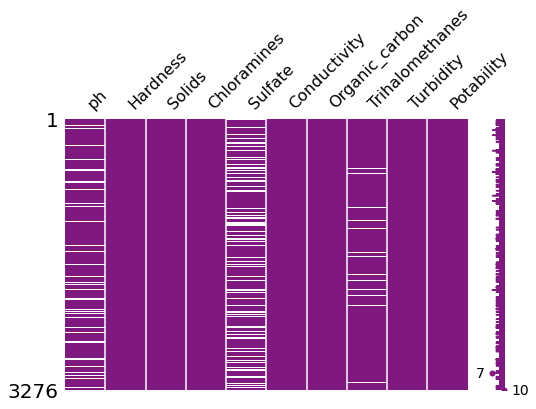

In [ ]:
from matplotlib import pyplot as plt
fig = msno.matrix(dataset_main,color=(0.5,0.1,0.5),figsize=(8, 5))


In [ ]:
# finding count of null values in each column
dataset_main.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# There are null values in ph, Sulphate and Trihalomethanes columns

# Removing null values from these columns 
dataset_main = dataset_main.dropna()
#dataset_main.fillna(dataset_main.mean(), inplace=True)
dataset_main.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
dataset_main.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

Data for not potable water = 1200 

Data for potable water = 811

To prevent bias, we need to balance potable and non potable data by applying resampling.

In [ ]:
X = dataset_main.drop('Potability', axis=1)
y = dataset_main['Potability']

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.25,
                                random_state=0)

In [ ]:
X_train.shape

(1508, 9)

In [ ]:
# concatenate our training data back together
X1 = pd.concat([X_train, y_train], axis=1)
X1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
968,7.856471,204.783428,5619.135558,5.816703,343.545419,432.043120,14.947720,55.961613,4.534681,0
2899,1.431782,228.130383,12937.246890,6.214773,319.734136,495.379883,12.033344,61.141119,4.948443,0
1952,6.444555,166.635180,24855.830040,9.492361,287.412380,479.479409,10.697068,65.655326,3.551905,1
2557,8.528292,227.686207,27352.343410,7.676323,349.995746,388.137754,12.611736,80.186071,4.596924,0
2325,5.685216,154.570002,17628.043060,6.664444,390.094731,324.427772,17.352586,67.407300,4.066157,1


In [ ]:
X1.Potability.value_counts()

0    891
1    617
Name: Potability, dtype: int64

In [ ]:
# applying resampling on X_train
notpotable  = X1[X1['Potability']==0]
potable = X1[X1['Potability']==1]  

# resampling potable water data
from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 891) 

# add resampled data in the dataset and shuffle 
from sklearn.utils import shuffle
X1 = pd.concat([notpotable, df_minority_upsampled])
X1 = shuffle(X1)

In [ ]:
# data after resampling
X1.Potability.value_counts()

0    891
1    891
Name: Potability, dtype: int64

In [ ]:
y_train = X1.Potability
X_train = X1.drop('Potability', axis=1)

# **ML Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
lr= LogisticRegression()
knn= KNeighborsClassifier()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
ada= AdaBoostClassifier()
xgb= XGBClassifier()
svm= SVC()
models = [('Logistic Regression', lr),('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb),('SVC', svm)]

Model_name=[]
Model_score=[]
for model_name, model in models:
 
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))
    Model_name.append(model_name)
    Model_score.append(accuracy)

Logistic Regression : 0.49
K Nearest Neighbours : 0.56
Decision Tree : 0.62
Random Forest : 0.71
AdaBoost : 0.57
XGBoost : 0.64
SVC : 0.56


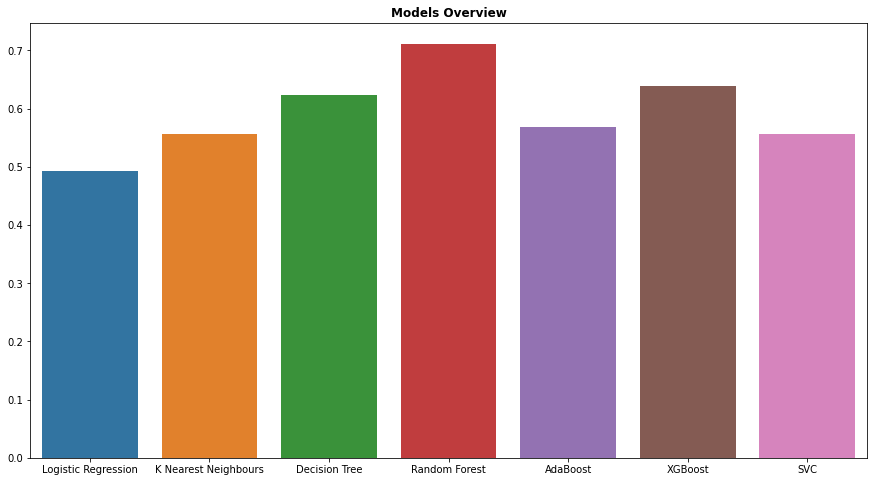

In [ ]:
plt.figure(figsize=(15,8))
g = sb.barplot(x = Model_name, y = Model_score)
plt.title('Models Overview', weight='bold');
g

In [ ]:
from sklearn.model_selection import GridSearchCV
Model_name=[]
Model_score=[]
def best_model_selection(X,y,X_test,y_test):
     algorithms={
         'random forest':{
             'model':RandomForestClassifier(),
             'params':{
                 'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[1, 2, 3, 10]
             }
          },
          'decision tree':{
              'model':DecisionTreeClassifier(),
              'params':{'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
          },
         'xgb':{
             'model':  XGBClassifier(),
             'params':{'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
          }
     }
     scores=[]
     for algo_name, config in algorithms.items():
        gs =  GridSearchCV(config['model'], config['params'],cv=5)
        gs.fit(X,y)
        y_pred = gs.predict(X_test)
        scores.append({
            'model': algo_name,
            'accuracy': accuracy_score(y_test,y_pred),
            'best_params': gs.best_params_
        })
        Model_name.append(algo_name)
        Model_score.append(accuracy_score(y_test,y_pred))
     return pd.DataFrame(scores,columns=['model','accuracy','best_params'])

In [ ]:
best_model_selection(X_train,y_train,X_test,y_test)

,model,accuracy,best_params
0,random forest,0.697813,"{'min_samples_leaf': 1, 'n_estimators': 100}"
1,decision tree,0.614314,"{'criterion': 'gini', 'max_depth': 42, 'min_sa..."
2,xgb,0.642147,"{'learning_rate': 1, 'n_estimators': 1000}"


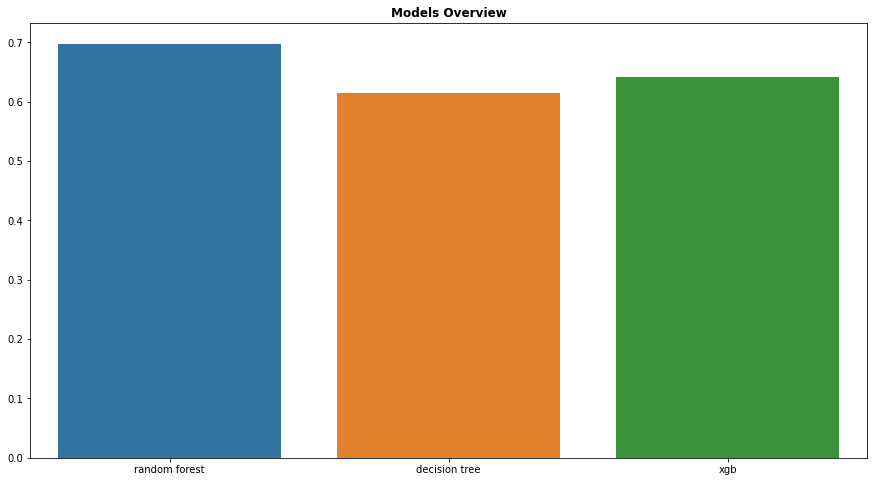

In [ ]:
plt.figure(figsize=(15,8))
g = sb.barplot(x = Model_name, y = Model_score)
plt.title('Models Overview', weight='bold');
g

In [ ]:
gs =  GridSearchCV(RandomForestClassifier(), [{'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[1, 2, 3, 10]}],cv=5)
gs.fit(X_train,y_train)   
y_pred = gs.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6898608349900597

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

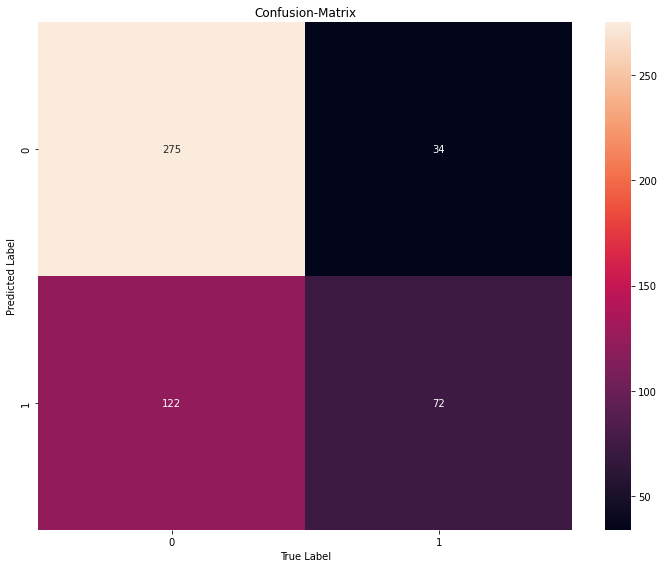

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax= sb.heatmap(confusion_matrix(y_test, y_pred),
                annot = True,
                cbar= True,
                fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion-Matrix')
plt.tight_layout()  
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       309
           1       0.68      0.37      0.48       194

    accuracy                           0.69       503
   macro avg       0.69      0.63      0.63       503
weighted avg       0.69      0.69      0.66       503



# **Deep Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.layers import Activation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1000, input_shape=(9,)))
model.add(Activation("relu"))


model.add(layers.Dense(500))
model.add(Activation("relu"))
model.add(Dropout(0.15))

model.add(layers.Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.15))

model.add(layers.Dense(50))
model.add(Activation("relu"))
model.add(Dropout(0.15))

model.add(layers.Dense(1))
model.add(Activation("relu"))

In [ ]:
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
history=model.fit(X_train,y_train, batch_size=32, epochs=300, validation_data =(X_test,y_test))

Epoch 1/300
56/56 [==============================] - 4s 10ms/step - loss: 7.7765 - accuracy: 0.4910 - val_loss: 9.3678 - val_accuracy: 0.3857
Epoch 2/300
56/56 [==============================] - 0s 7ms/step - loss: 7.7620 - accuracy: 0.4944 - val_loss: 5.9492 - val_accuracy: 0.6143
Epoch 3/300
56/56 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.9492 - val_accuracy: 0.6143
Epoch 4/300
56/56 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.9492 - val_accuracy: 0.6143
Epoch 5/300
56/56 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.9492 - val_accuracy: 0.6143
Epoch 6/300
56/56 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.9492 - val_accuracy: 0.6143
Epoch 7/300
56/56 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 5.9492 - val_accuracy: 0.6143
Epoch 8/300


In [ ]:
eval_model=model.evaluate(X_test, y_test)
eval_model

16/16 [==============================] - 0s 4ms/step - loss: 5.9492 - accuracy: 0.6143


[5.949184894561768, 0.6143141388893127]

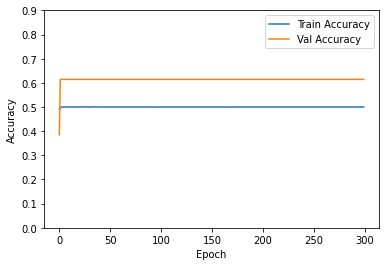

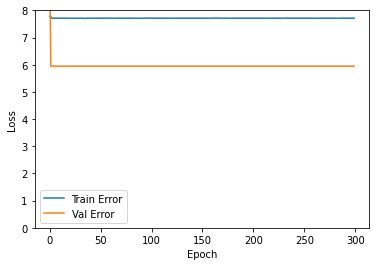

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
  plt.ylim([0,0.9])
  plt.legend()
  plt.show()
    
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,8])
  plt.legend()
  plt.show()


plot_history(history)

# **Exporting the Random Forest model to a picle file**

In [ ]:
import pickle
with open('ground_water_management_model.pickle','wb') as f:
    pickle.dump(rf,f)

# **Conclusion**

The correlation coefficients between the features were very low.

We received almost similar performance for for both the classes- potable and non potable. For potable (1), we got an Precision of 0.68 , Recall of 0.37 ,F1-score of 0.48.

For non-potable (0), we got an Precision of 0.69 ,Recall of 0.89 ,F1-score of 0.78.

We also trained neural network models and experimented on many parameters. 

We received the best accuracy of 0.71 on Random Forest.